# Titanic dataset (https://www.kaggle.com/c/titanic/data)

### Author: Maxim Shmakov

In [1]:
from sys import executable
!{executable} -m pip install numpy pandas seaborn scipy matplotlib sklearn statsmodels

In [2]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import kstest
from collections import Counter
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(context='notebook')
pd.set_option('display.float_format', lambda x: f'{x :.2f}')

In [4]:
train_data = pd.read_csv("./titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [5]:
test_data = pd.read_csv("./titanic/train.csv")
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


Checking for NaN variables and for the types of variables:

In [6]:
print(train_data.info())
print('\n')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   S

In [7]:
print(train_data.isnull().sum())
print('\n')
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Getting the dataset statistics:

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


Information about categorical variables:

In [9]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Devaney, Miss. Margaret Delia",male,1601,G6,S
freq,1,577,7,4,644


Now let's detect the outliers, show them and drop from training dataset:

In [10]:
indices = []
features = ["Age", "SibSp", "Parch", "Fare"]

for feat in features:
    Q1 = np.percentile(train_data[feat], 25)
    Q3 = np.percentile(train_data[feat],75)

    IQR = Q3 - Q1
    step = 1.5 * IQR

    list_col = train_data[(train_data[feat] < Q1 - step) | (train_data[feat] > Q3 + step)].index
    indices.extend(list_col)

outliers = list(key for key, value in Counter(indices).items() if value > 2)
train_data.loc[outliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,nan,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,nan,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,nan,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,nan,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,nan,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,nan,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,NaN,S


In [11]:
train_data = train_data.drop(outliers, axis = 0).reset_index(drop=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


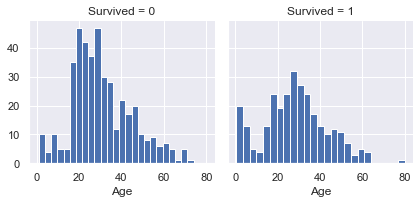

In [12]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'Age', bins=25)

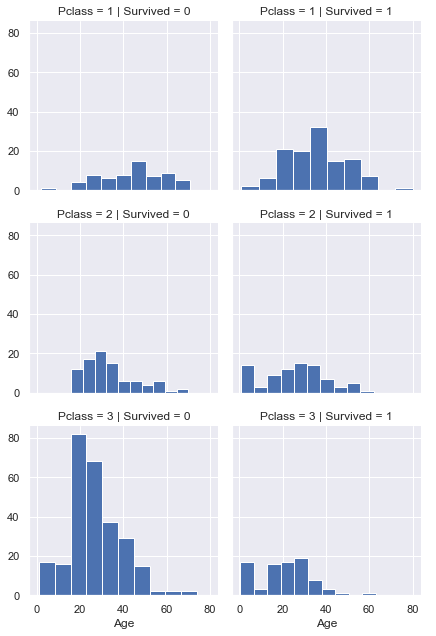

In [13]:
sns.FacetGrid(train_data, col='Survived', row='Pclass').map(plt.hist, 'Age').add_legend();

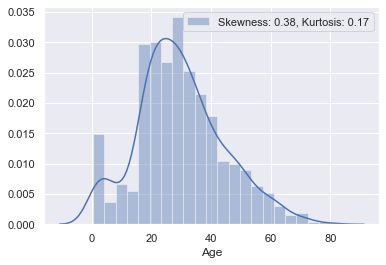

In [14]:
sns.distplot(train_data["Age"],
             label=f"Skewness: {train_data['Age'].skew() :.2f}, Kurtosis: {train_data['Age'].kurt() :.2f}").legend()

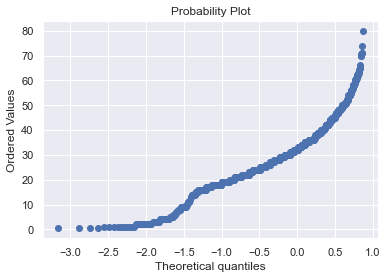

In [15]:
fig = plt.figure()
res = stats.probplot(train_data['Age'], plot=plt)
plt.show()

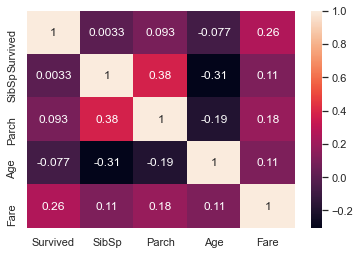

In [16]:
sns.heatmap(train_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot=True)

So, we can consider that Fare feature have a significant correlation with the survival probability.

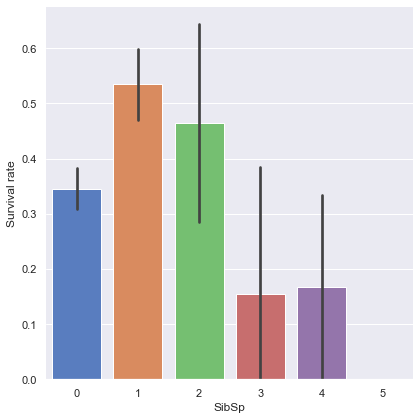

In [17]:
sns.factorplot(x="SibSp",
               y="Survived",
               data=train_data,
               kind="bar",
               size = 6,
               palette = "muted").despine(left=True).set_ylabels("Survival rate")

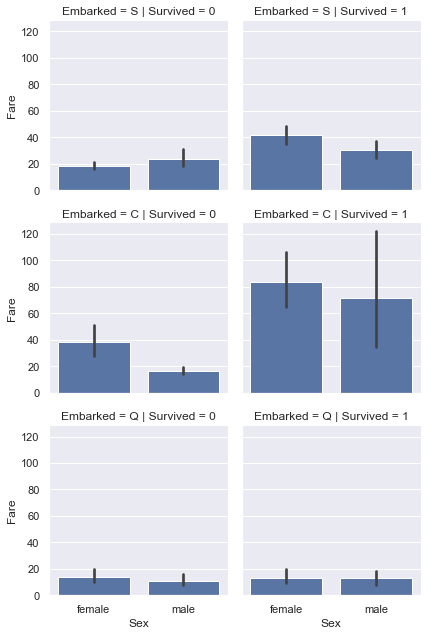

In [18]:
sns.FacetGrid(train_data, row='Embarked', col='Survived').map(sns.barplot, 'Sex', 'Fare').add_legend()

In [19]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.63
1,2,0.47
2,3,0.25


In [20]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.75
1,male,0.19


In [21]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.54
2,2,0.46
0,0,0.35
4,4,0.17
3,3,0.15
5,5,0.00


In [22]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.60
1,1,0.55
2,2,0.54
0,0,0.34
5,5,0.20
4,4,0.00
6,6,0.00


In [23]:
train_data = train_data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

combined_df = [train_data, test_data]

In [24]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S


Now let's analyze the possible encodings for categorical and numerical data:

In [25]:
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [26]:
guess_ages = np.zeros((2,3))

for dataset in combined_df:
    # Mapping the categorical variable Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    # Filling the missing values in Embarked and encoding it (unique values are S, С, Q)
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset.Embarked.dropna().mode()[0])
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.00,1,0,7.25,0
1,1,1,1,38.00,1,0,71.28,1
2,1,3,1,26.00,0,0,7.92,0
3,1,1,1,35.00,1,0,53.10,0
4,0,3,0,35.00,0,0,8.05,0


In [27]:
# Processing the age
for dataset in combined_df:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()

            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), 'Age'] = guess_ages[i,j]

    # Encoding age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

    dataset['Age'] = dataset['Age'].astype(int)

combined_df[0]['Age'].describe()

count   881.00
mean      2.15
std       7.66
min       0.00
25%       1.00
50%       1.00
75%       2.00
max      80.00
Name: Age, dtype: float64

In [28]:
combined_df = [train_data, test_data]
train_data.shape, test_data.shape

((881, 8), (891, 8))

Working with dataset splitting:

In [29]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("Pclass", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((881, 7), (881,), (891, 7))

Logistic Regression:

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
f"Score of logreg: {acc_log}"

'Score of logreg: 79.57'

In [31]:
sm_model = sm.OLS(Y_train, X_train).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.570
Method:                 Least Squares   F-statistic:                              167.7
Date:                Thu, 14 May 2020   Prob (F-statistic):                   7.15e-157
Time:                        01:16:23   Log-Likelihood:                         -455.54
No. Observations:                 881   AIC:                                      925.1
Df Residuals:                     874   BIC:                                      958.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0352      0.008      4.638      0.000       0.020       0.050
Sex            0.5797      0.030     19.475      0.000       0.521       0.638
Age         -8.21e-05      0.002     -0.046      0.963      -0.004       0.003
SibSp         -0.0280      0.017     -1.632      0.103      -0.062       0.006
Parch         -0.0253      0.020     -1.299      0.194      -0.064       0.013
Fare           0.0025      0.000      8.881      0.000       0.002       0.003
Embarked       0.0367      0.022      1.661      0.097      -0.007       0.080
==============================================================================
Omnibus:                       35.502   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.748
Skew:                           0.498   Prob(JB):                     3.86e-09
Kurtosis:                       3.256   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
f'Significant features: {sm_model.pvalues[sm_model.pvalues < 0.05].index.values}'

"Significant features: ['Pclass' 'Sex' 'Fare']"

In [33]:
f'P-value: {kstest(sm_model.resid, "norm").pvalue :.3f}'

'P-value: 0.000'

In [34]:
test = sm.stats.het_breuschpagan(sm_model.resid, sm_model.model.exog)

for n, t in zip(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'], test):
    print(f'{n}: {t :.3f}')

Lagrange multiplier statistic: 252.212
p-value: 0.000
f-value: 50.081
f p-value: 0.000
